<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Признак-Target" data-toc-modified-id="Признак-Target-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Признак <code>Target</code></a></span></li><li><span><a href="#Признак-0" data-toc-modified-id="Признак-0-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Признак <code>0</code></a></span></li><li><span><a href="#Признак-6" data-toc-modified-id="Признак-6-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Признак <code>6</code></a></span></li><li><span><a href="#Признак-21" data-toc-modified-id="Признак-21-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Признак <code>21</code></a></span></li><li><span><a href="#Признак-25" data-toc-modified-id="Признак-25-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Признак <code>25</code></a></span></li><li><span><a href="#Признак-33" data-toc-modified-id="Признак-33-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Признак <code>33</code></a></span></li><li><span><a href="#Признак-44" data-toc-modified-id="Признак-44-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Признак <code>44</code></a></span></li><li><span><a href="#Признак-59" data-toc-modified-id="Признак-59-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Признак <code>59</code></a></span></li><li><span><a href="#Признак-65" data-toc-modified-id="Признак-65-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Признак <code>65</code></a></span></li><li><span><a href="#Признак-70" data-toc-modified-id="Признак-70-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Признак <code>70</code></a></span></li></ul></li><li><span><a href="#Разработка-новых-синтетических-признаков" data-toc-modified-id="Разработка-новых-синтетических-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разработка новых синтетических признаков</a></span><ul class="toc-item"><li><span><a href="#Нормализация-(масштабирование)-численных-признаков" data-toc-modified-id="Нормализация-(масштабирование)-численных-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Нормализация (масштабирование) численных признаков</a></span></li><li><span><a href="#Проверка-данных-на-мультиколлинеарность" data-toc-modified-id="Проверка-данных-на-мультиколлинеарность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка данных на мультиколлинеарность</a></span></li><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Исследование-опций-алгоритма" data-toc-modified-id="Исследование-опций-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование опций алгоритма</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-разделу" data-toc-modified-id="Выводы-по-разделу-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы по разделу</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Метчинг товаров

**Исходные данные:** Имеются базовая, обучающая и валидационная выборки, содержащие анонимизированный набор информации о товарах - в виде векторов признаков заданной длины.<br>
**Цель работы:** Разработать и протестировать алгоритм (в т.ч., с использованием, при необходимости - для решения дополнительной задачи ранжирования, ML-модели), позволяющий каждому товару из валидационной выборки сопоставить наиболее близкие товары из базовой выборки (по заданной метрике качества).<br>

## Загрузка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import faiss

from sklearn.preprocessing import StandardScaler, RobustScaler

import phik
from phik.report import plot_correlation_matrix

In [2]:
data_base = pd.read_csv(r'C:\Users\geras\OneDrive\Рабочий стол\Мастерская 2\base.csv', index_col=0)
data_train = pd.read_csv(r'C:\Users\geras\OneDrive\Рабочий стол\Мастерская 2\train.csv', index_col=0)
data_val = pd.read_csv(r'C:\Users\geras\OneDrive\Рабочий стол\Мастерская 2\validation.csv', index_col=0)
data_val_a = pd.read_csv(r'C:\Users\geras\OneDrive\Рабочий стол\Мастерская 2\validation_answer.csv', index_col=0)


In [3]:
pd.set_option('display.max_columns', None)

In [50]:
K_NEIGHBORS = 5

In [4]:
data_base.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,181.449700,-124.06151,-32.458237,-57.420560,36.207405,182.71677,-28.071688,-5.209374,-1.732182,-91.09186,-79.46667,-103.939090,1507.231274,-32.591667,51.414360,-51.905360,813.770071,-41.556538,8.419807,-129.976640,148.76503,-10.069234,-143.00504,79.848694,-537.183707,2.773180,111.518680,4.257666,-153.34058,-123.62608,-39.707664,-12.768708,-4.170106,-152.967130,75.911520,-57.470088,17.266476,-98.871155,-138.06754,91.000380,-170.702000,-50.020390,59.794296,78.106380,-89.375725,89.412100,79.812180,-129.51361,-44.659496,-80.44221,5.149714,-64.518950,-138.77763,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,195.234190,-141.30435,-126.768900,-68.853530,8.314717,143.08174,8.778257,15.157185,48.246360,-244.95486,-80.27942,-81.788040,429.880035,-5.937690,70.142654,66.576840,813.770071,3.214371,17.164303,-39.418385,148.15588,-7.579590,-174.36995,101.224630,-303.939233,16.914630,53.394676,33.451824,-148.55263,-110.34017,-33.277206,-8.688703,13.650302,-91.228745,38.445015,-31.948470,62.484820,-166.473360,-189.01042,-56.731556,-30.027319,59.171060,-56.711540,63.542606,-121.319170,97.426056,74.832840,-138.77705,58.887608,-71.59534,-251.952358,11.392853,-148.57166,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,164.381470,-140.82245,-22.486748,-51.666990,2.521726,140.58545,-22.039230,-7.128634,-5.184787,-111.71212,-79.02927,-82.452576,1507.231274,-0.421011,84.108010,63.344510,813.770071,-105.211050,18.844700,-94.789474,151.38771,-21.483440,-144.84537,48.502934,-780.449185,64.767310,79.781555,-13.390142,-150.06166,-118.75855,-40.896286,-15.222620,-1.860338,-93.820656,98.749070,-46.745782,65.927475,-10.286392,-125.32137,21.048609,-22.637775,68.915985,-54.902260,66.335470,-142.927920,83.030980,69.979630,-123.73389,65.320880,-114.03718,-529.396956,-101.581375,-134.65822,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,136.233580,-108.47044,-104.537780,-82.388490,-79.986740,113.59631,-38.995880,-4.787360,8.327808,-124.85576,-79.10902,-107.943275,1479.170530,-125.271614,24.656485,-16.921055,813.770071,-182.680270,14.715704,-62.932700,151.20198,10.613454,-134.93434,58.777730,-529.295053,43.665924,92.806305,-38.936657,-145.04530,-124.29577,-36.876730,-17.742870,10.536242,-124.584150,121.914150,-17.321358,105.217240,-94.379650,-63.76927,29.217487,-26.423973,5.869829,64.061550,63.513280,-112.258100,80.926590,72.636100,-137.31432,7.912551,-62.18892,-540.321044,-89.588715,-149.32669,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,112.119064,-110.34245,-38.982060,-50.228867,-26.690920,135.27290,-7.510103,8.924209,111.576950,-130.83319,-79.31585,-57.843952,1262.919738,19.225910,59.811813,76.159670,312.698903,-76.726974,21.299923,-24.069107,167.38553,-44.059470,-148.13185,98.042610,-657.524388,96.363170,71.061520,-36.563557,-135.37244,-123.70898,-44.739437,-10.855220,8.354800,-168.328860,215.928070,-32.975979,66.864880,30.838630,-211.54037,57.695343,-67.822630,-29.389133,-34.123740,54.710550,-26.032013,90.673910,58.086998,-134.78206,77.62

In [5]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,Target
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-query,-53.882748,17.971436,-42.117104,-183.93668,187.517490,-87.144930,-347.360606,38.307602,109.085560,30.413513,-88.08269,-52.695540,-27.692442,4.872923,198.348000,-30.075249,-3.803569,-135.810610,-161.84137,-78.512180,-94.42894,898.436927,-70.140520,78.420360,108.032776,813.770071,-74.790880,12.610422,-183.821840,149.71584,-27.042316,-133.21217,106.420746,-303.939233,48.73079,58.185707,24.250950,-151.22410,-104.282265,-34.492810,-12.587054,2.622891,-120.969920,149.99164,-31.948470,82.314430,-115.830470,-243.30939,6.622036,-132.197660,68.71256,-38.806824,62.937435,-132.65445,89.189026,87.039780,-121.27988,-6.986934,-206.513820,29.485587,-77.029590,-132.38617,-105.427820,70.107360,-155.80257,-101.965943,65.903790,34.457500,62.642094,134.763600,-415.750254,-25.958572,675816-base
1-query,-87.776370,6.806268,-32.054546,-177.26039,120.803330,-83.810590,-94.572749,-78.433090,124.915900,140.331070,-177.60580,-84.995514,42.810810,-57.256332,96.792534,-19.261467,0.739535,50.619213,-155.26703,-78.659430,-92.76149,353.157741,-34.744545,82.487110,-28.450592,813.770071,-137.529630,26.595627,-136.783450,153.35791,48.810093,-115.92215,87.464220,-222.286354,25.12415,91.887140,-30.636870,-136.59314,-140.500120,-43.449757,-7.226884,8.265747,-117.915470,149.15090,-18.751057,95.315384,-60.093273,-83.82058,37.449867,-23.298859,74.06108,-7.139753,75.862400,-112.04511,82.857730,54.067215,-134.00539,-26.142574,-214.632110,-457.848461,21.459618,-137.41136,-40.812233,4.669178,-151.69771,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092211,-51.276833,366656-base
2-query,-49.979565,3.841486,-116.118590,-180.40198,190.128430,-50.837620,26.943937,-30.447489,125.771164,211.607820,-86.34656,-35.666546,16.395317,-80.802850,137.908650,-23.532760,-47.256584,-16.650242,-194.50568,-78.372925,-69.32448,1507.231274,-52.500970,-34.165775,52.958652,813.770071,-18.021725,20.951107,-50.321780,158.76062,0.178065,-183.06967,99.053570,-1018.469545,-51.80112,97.766770,-10.865850,-144.42316,-133.819490,-78.902300,-17.200352,4.467452,-63.970737,154.63953,-30.211614,48.527400,-122.406640,-112.71362,53.461838,-31.117260,107.84151,16.482935,77.934480,-95.61873,91.460075,63.119510,-126.93925,8.066627,-195.677670,-163.120000,-72.830000,-139.22307,-52.031662,78.039764,-169.14620,82.144186,66.008220,18.400496,212.409730,121.931470,-1074.464888,-22.547178,1447819-base
3-query,-47.810562,9.086598,-115.401695,-121.01136,94.652840,-109.255410,-775.150134,79.186520,124.003100,242.650650,-146.51707,-159.469850,-13.844755,-6.113928,118.939255,-44.585907,9.559358,14.435648,-156.90683,-78.789320,-78.73709,1507.231274,19.957405,34.834290,-8.820732,813.770071,-125.606800,17.584084,-58.452904,141.28180,-54.959310,-136.98854,63.880493,-1018.469545,89.22893,65.919960,-24.078644,-152.33410,-91.199380,-28.225390,-4.767386,0.158236,-129.128660,122.95837,-30.800995,123.623400,-37.540867,-72.13980,71.240990,-168.115590,118.23645,-18.065195,37.255720,-137.69104,87.500770,62.437290,-131.26064,35.692660,-86.038830,-379.339090,-153.465770,-131.19829,-61.567047,44.515266,-145.41675,93.990981,64.131350,106.061920,83.178760,118.277725,-1074.464888,-19.902788,1472602-base
4-query,-79.632126,14.442886,-58.903397,-147.05254,57.127068,-16.239529,-321.317964,45.984676,125.941284,103.392670,-107.15302,-8.800034,-50.977800,29.457338,143.389310,5.614824,-45.274760,9.643625,-77.55463,-79.066610,-77.92646,1507.231274,16.612400,116.284290,33.754898,813.770071,-105.765335,6.523008,-19.812988,157.69392,-20.604088,-146.59128,78.849570,-780.449185,87.56077,73.036660,16.891030,-144.65790,-116.122150,-19.353254,-7.709266,-5.394988,-140.252120,193.18497,-53.147078,79.869446,-151.131350,-45.05616,79.796234,46.763016,47.68181,-

In [6]:
data_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000-query,-57.372734,3.597752,-13.213642,-125.92679,110.74594,-81.279594,-461.003172,139.815720,112.880980,75.215750,-131.89280,-140.968570,-57.987164,-22.868887,150.89552,7.965574,17.622066,-34.868217,-216.13855,-80.908730,-52.579520,263.363136,56.266876,66.924710,21.609911,813.770071,-32.782940,20.794031,-79.779076,156.30708,-42.831330,-71.723335,83.283660,-304.174382,1.609402,55.834587,-29.474255,-139.16277,-126.038350,-62.643830,-5.012346,11.984920,-43.084946,190.124000,-24.996636,76.153900,-245.26157,-143.65648,-4.259628,-46.664196,-27.085403,-34.346962,75.530106,-47.171707,92.697320,60.475630,-127.48687,-39.484753,-124.384575,-307.949760,45.506813,-144.19095,-75.51302,52.830902,-143.43945,59.051935,69.28224,61.927513,111.59253,115.140656,-1099.130485,-117.079360
100001-query,-53.758705,12.790300,-43.268543,-134.41762,114.44991,-90.520130,-759.626065,63.995087,127.117905,53.128998,-153.71725,-63.951330,-52.369495,-33.390945,148.61950,-22.483830,15.164185,-56.202000,-153.61438,-79.831825,-101.055480,1203.537156,81.597130,101.018654,56.783424,92.209628,-126.860340,10.382887,-38.523360,165.38391,-77.840485,-169.538680,103.483240,-915.735701,16.109938,14.669937,-38.707085,-149.53838,-138.792920,-36.076176,-2.781422,2.283144,-142.477890,189.953950,-18.408230,90.517050,-95.53100,-259.63605,52.437836,-30.004599,14.502060,-1.071201,66.842670,-161.279890,94.794174,50.419983,-125.07526,-25.169033,-176.176880,-655.836897,-99.238370,-141.53522,-79.44183,29.185436,-168.60590,-82.872443,70.76560,-65.975950,97.07716,123.391640,-744.442332,-25.009320
100002-query,-64.175095,-3.980927,-7.679249,-170.16093,96.44616,-62.377740,-759.626065,87.477554,131.270110,168.920320,-220.30954,-31.378445,-8.788761,2.285323,133.26611,-41.309080,14.305538,-18.231812,-205.53370,-78.160310,-96.607670,1507.231274,-5.964200,34.937443,-56.086887,813.770071,-13.200474,18.966661,-35.110190,151.36850,-17.490252,-145.884300,15.533379,-655.395514,39.412827,62.554955,9.924992,-143.93462,-123.107796,-37.032475,-13.501337,12.913328,-116.038020,176.276150,-45.909942,103.491360,-90.65699,-162.61570,117.128235,13.079479,69.826890,-6.874451,63.707214,-123.851070,91.610820,59.760067,-129.56618,-12.822194,-154.197650,-407.199067,5.522629,-126.81297,-134.79541,37.368730,-159.66231,-119.232725,67.71044,86.002060,137.63641,141.081630,-294.052271,-70.969604
100003-query,-99.286860,16.123936,9.837166,-148.06044,83.69708,-133.729720,58.576403,-19.046660,115.042404,75.206730,-114.27196,-71.406456,-65.349320,24.377070,50.46730,-14.721335,15.069309,-46.682995,-176.60437,-78.690700,-139.227450,325.547112,3.632292,74.929504,-4.802103,813.770071,-52.982597,15.644381,-54.087467,151.30914,21.088570,-134.507890,65.118960,-529.295053,131.565520,67.642700,-22.884491,-145.90652,-86.917330,-11.863579,-22.188885,0.463720,-212.533750,170.522580,-48.092532,99.712555,-194.69241,-141.52318,60.217050,73.386380,118.567856,58.900810,55.569030,-181.091660,83.340485,66.083240,-114.04887,-57.156870,-56.335075,-318.680065,-15.984783,-128.10133,-77.23611,44.100494,-132.53012,-106.318982,70.88396,23.577892,133.18396,143.252940,-799.363667,-89.392670
100004-query,-79.532920,-0.364173,-16.027431,-170.88495,165.45392,-28.291668,33.931936,34.411217,128.903980,102.086914,-76.21417,-26.393860,34.423640,50.938890,157.68318,-23.786497,-33.175415,-0.592607,-193.31854,-79.651030,-91.889786,1358.481072,44.027733,121.527210,46.183000,433.623103,-82.233200,21.068508,-32.940117,149.26895,0.404718,-97.674530,81.719990,-825.644804,9.397169,49.359340,17.725466,-160.16815,-129.367950,-55.532898,-2.597821,-0.226103,-41.369140,92.090195,-58.626857,73.655440,-10.25737,-175.65678,25.395056,47.874825,51.464676,140.951680,58.751133,-215.487640,91.255

In [7]:
data_val_a.head()

,Expected
Id,
100000-query,2676668-base
100001-query,91606-base
100002-query,472256-base
100003-query,3168654-base
100004-query,75484-base


In [8]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918139 entries, 0-base to 4744766-base
Data columns (total 72 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0-query to 99999-query
Data columns (total 73 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21  21  

In [10]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 100000-query to 199999-query
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21

In [11]:
data_val_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 100000-query to 199999-query
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Expected  100000 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


Данные загружены корректно, можно приступать к исследовательскому анализу и предобработке.

## Исследовательский анализ данных

In [12]:
data_base.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
count,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06,2.918139e+06
mean,-8.622947e+01,8.080077e+00,-4.458080e+01,-1.466350e+02,1.113166e+02,-7.199138e+01,-3.922239e+02,2.035283e+01,1.236842e+02,1.244581e+02,-1.431396e+02,-6.988662e+01,-4.126493e+01,7.587780e+00,1.489852e+02,-2.316701e+01,-9.366916e-01,-1.931312e+01,-1.372712e+02,-7.918932e+01,-9.825383e+01,1.257528e+03,-6.824936e+00,5.667382e+01,2.669563e+01,7.271026e+02,-6.625340e+01,1.631537e+01,-8.637482e+01,1.517346e+02,-1.160764e+01,-1.442328e+02,8.721997e+01,-5.541608e+02,3.623933e+01,7.519918e+01,-1.648670e+01,-1.466421e+02,-1.185122e+02,-4.187896e+01,-9.482269e+00,4.050654e+00,-1.127440e+02,1.208653e+02,-3.980939e+01,5.893878e+01,-8.488885e+01,-1.384695e+02,4.792759e+01,-3.238229e+01,2.658408e+01,-2.171709e+01,6.699684e+01,-1.178976e+02,8.802818e+01,6.920454e+01,-1.329056e+02,1.322645e+01,-1.195996e+02,-3.160935e+02,-6.494332e+01,-1.306677e+02,-7.902286e+01,3.329735e+01,-1.547962e+02,1.415132e+01,6.779167e+01,2.354490e+01,7.495930e+01,1.155667e+02,-7.993390e+02,-4.779125e+01
std,2.489132e+01,4.953387e+00,3.863166e+01,1.984480e+01,4.634809e+01,2.818607e+01,2.716550e+02,6.421638e+01,6.356109e+00,6.443058e+01,4.168737e+01,5.121991e+01,3.896358e+01,3.659725e+01,3.363559e+01,1.307563e+01,2.083201e+01,5.297210e+01,4.662566e+01,7.574403e-01,2.815861e+01,3.999612e+02,5.197251e+01,3.436061e+01,3.894157e+01,2.055724e+02,6.153334e+01,4.656628e+00,4.851313e+01,1.009000e+01,2.895059e+01,3.475739e+01,2.785556e+01,2.606486e+02,3.989506e+01,2.144713e+01,2.585462e+01,9.953913e+00,1.314411e+01,1.919689e+01,8.190720e+00,5.835750e+00,5.694050e+01,4.671995e+01,1.474482e+01,3.211030e+01,6.319335e+01,5.773822e+01,4.520157e+01,5.828693e+01,5.895291e+01,5.173898e+01,1.307173e+01,5.470584e+01,4.774309e+00,1.194907e+01,7.815245e+00,5.107988e+01,5.524317e+01,2.106644e+02,6.248236e+01,9.569063e+00,3.045642e+01,2.888603e+01,4.122929e+01,9.895115e+01,1.823356e+00,5.534224e+01,6.134500e+01,2.117518e+01,3.854131e+02,4.174802e+01
min,-1.994687e+02,-1.391461e+01,-2.400734e+02,-2.326671e+02,-1.055830e+02,-2.110086e+02,-7.914699e+02,-3.018597e+02,9.315305e+01,-1.738719e+02,-3.438436e+02,-3.684526e+02,-2.260906e+02,-1.756239e+02,-1.526698e+01,-8.591711e+01,-9.636816e+01,-2.725656e+02,-3.517478e+02,-8.315235e+01,-2.437279e+02,1.368182e+02,-2.382874e+02,-8.818329e+01,-1.431833e+02,-6.198046e+01,-3.585515e+02,-8.364693e+00,-3.140082e+02,1.074433e+02,-1.567305e+02,-2.986792e+02,-3.465488e+01,-1.045312e+03,-1.378509e+02,-2.151936e+01,-1.379866e+02,-1.954172e+02,-1.769110e+02,-1.327073e+02,-4.757769e+01,-2.158085e+01,-3.381192e+02,-8.770834e+01,-6.310310e+01,-7.724959e+01,-3.629306e+02,-4.186953e+02,-1.453876e+02,-3.228121e+02,-2.802731e+02,-2.646334e+02,6.196133e+00,-3.812643e+02,6.558115e+01,1.408166e+01,-1.670627e+02,-1.961836e+02,-3.597054e+02,-6.810424e+02,-4.007911e+02,-1.713491e+02,-2.205662e+02,-8.850774e+01,-3.539028e+02,-1.575944e+02,5.95094

In [13]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-85.328679,7.664345,-43.667046,-146.118630,111.770592,-73.178792,-440.615118,21.231588,123.067891,126.120201,-141.168584,-69.228444,-42.559541,6.506719,149.077582,-23.942253,-2.219093,-12.964439,-138.714610,-79.159795,-97.474574,1297.269578,-3.600685,55.908014,23.470181,742.788817,-64.970553,16.368072,-86.201170,152.098083,-13.659323,-144.506022,89.747894,-587.551768,36.468210,73.109595,-13.866967,-146.487267,-118.336458,-41.131969,-9.261504,4.139978,-104.928806,122.240784,-40.320211,59.051981,-84.054387,-140.787854,46.137851,-34.136875,29.462927,-22.343451,67.581086,-120.052756,88.193676,69.538752,-132.336967,14.452681,-120.301843,-315.282239,-66.378660,-130.672183,-81.145553,36.898233,-152.223082,14.001695,67.799560,23.029277,73.412076,115.189717,-709.761548,-48.505704
std,25.803845,4.955651,39.111064,20.434841,47.700958,28.718853,279.017550,65.985214,6.492081,64.912752,41.607785,51.258647,40.819544,37.593800,34.167843,13.024184,20.978943,55.210920,48.737245,0.775560,28.382144,375.123794,50.063680,35.617513,40.802653,191.052074,63.160650,4.828575,49.511818,10.392531,29.191689,35.816357,28.312124,273.294442,39.756311,20.008170,25.824911,10.383975,13.578397,19.868303,8.295381,5.922103,56.519443,48.109909,14.739497,31.088173,66.055063,59.851232,46.328286,59.325454,60.934591,54.991787,12.988132,55.920785,4.824051,12.339684,7.952113,49.234745,55.730177,210.657513,64.913422,9.408099,30.675871,25.357686,41.020285,99.079597,1.838012,55.470761,62.203132,21.582238,405.961084,41.215124
min,-186.280270,-11.560507,-224.896060,-223.307220,-93.272020,-184.962450,-791.469482,-278.582820,94.831150,-142.156950,-330.570600,-352.405200,-214.742460,-145.860280,8.818390,-82.645004,-91.657020,-247.589280,-326.648740,-82.637184,-228.808260,136.873137,-211.971800,-87.323780,-122.584274,-61.803358,-338.562500,-6.629074,-285.668700,111.387250,-130.444920,-290.124000,-25.550720,-1044.135662,-119.903810,-11.926712,-124.560380,-193.918150,-166.078460,-123.062420,-43.063824,-18.980648,-324.943570,-67.540375,-63.102401,-64.789690,-327.322720,-365.060880,-129.879180,-280.371830,-250.337570,-236.148470,18.477040,-354.915700,66.068665,18.104557,-161.189320,-183.849880,-330.638180,-681.029305,-358.460450,-169.566400,-210.059310,-60.779335,-317.831670,-157.590189,60.668890,-203.746380,-181.973820,22.598862,-1297.871984,-209.935760
25%,-103.309147,4.313784,-69.494487,-160.028520,79.474322,-92.834080,-738.536868,-22.131764,118.674642,82.545028,-168.599020,-103.048815,-69.801705,-18.815189,126.369124,-32.379752,-16.455603,-49.612492,-171.661355,-79.656816,-115.407545,1248.126198,-37.047511,31.436791,-5.051067,813.770071,-106.860569,13.187895,-119.613590,145.143008,-32.812503,-168.535163,70.432237,-803.390708,9.505674,59.978086,-30.926924,-153.339210,-127.603408,

In [14]:
data_val.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-85.302233,7.669724,-43.842474,-146.119797,111.635071,-73.273042,-441.396759,21.594242,123.077725,126.001062,-141.215384,-69.340237,-42.626768,6.272022,149.006081,-23.961728,-2.009594,-13.151269,-138.540600,-79.162680,-97.356361,1301.395163,-3.439855,56.097825,23.357262,741.156981,-64.986388,16.367853,-86.139332,152.078754,-13.476064,-144.568331,89.709031,-588.597042,36.554961,73.085400,-13.889099,-146.461500,-118.391474,-40.992214,-9.193917,4.157828,-104.775965,122.095524,-40.311826,59.123753,-83.620997,-141.003063,46.187760,-34.154328,29.404870,-22.542637,67.486142,-120.307717,88.174847,69.495540,-132.377437,14.411927,-120.381837,-316.401557,-66.614887,-130.653256,-81.129311,36.778882,-152.341249,14.397762,67.788892,23.250779,73.114446,115.196935,-709.457021,-48.416276
std,25.777321,4.956990,39.138775,20.495541,47.751576,28.515740,279.242585,66.478048,6.504931,64.981697,41.568432,51.483403,40.858017,37.845939,34.031665,13.014670,20.993654,55.340411,48.790143,0.777431,28.503558,371.543911,50.291410,35.599512,40.849607,193.199671,63.274623,4.845841,49.511970,10.406558,29.275776,35.911251,28.430405,273.788805,39.610961,20.044353,25.802824,10.389778,13.602543,19.845968,8.364438,5.910225,56.986969,48.130993,14.753263,31.126990,65.925312,59.595488,45.996789,59.611850,60.943297,55.140398,13.036243,56.107653,4.809309,12.324416,7.894675,49.387024,55.818220,211.131373,65.195278,9.426921,30.691590,25.427103,41.246347,98.695231,1.844522,55.403862,62.056224,21.493081,405.665764,41.292843
min,-190.353330,-11.109877,-217.538420,-220.050890,-81.198990,-176.705030,-791.460243,-265.608430,96.218350,-135.667300,-321.544250,-363.493320,-204.299130,-144.100740,-14.816055,-78.597450,-86.843280,-272.565600,-329.860170,-82.665300,-231.376650,136.846377,-208.900850,-84.224530,-138.217000,-61.879841,-341.962220,-6.662937,-282.249330,110.357254,-150.154720,-281.123540,-24.076744,-1044.135662,-117.473145,-17.641396,-124.311615,-194.132930,-166.124450,-126.336075,-43.321170,-19.319794,-326.301300,-79.304720,-63.102401,-76.792040,-365.282530,-375.452200,-121.267914,-277.375920,-279.886380,-234.521500,12.404751,-381.609380,65.986030,17.301888,-162.872990,-156.581590,-329.700800,-681.038139,-339.966340,-168.735570,-215.152280,-66.265970,-337.632870,-157.593541,60.377728,-210.672800,-175.921780,25.271042,-1297.923999,-209.935760
25%,-103.231790,4.292425,-69.680916,-160.210287,79.101920,-92.789803,-740.620025,-21.804730,118.657689,82.311205,-168.562772,-103.338022,-70.147153,-19.089412,126.442184,-32.356516,-16.392179,-49.942476,-171.695623,-79.665475,-115.390365,1248.126198,-36.891637,31.741733,-5.265194,813.770071,-107.339855,13.182383,-119.527813,145.126130,-32.815898,-168.729353,70.166879,-803.390708,9.700724,59.971492,-30.786210,-153.332742,-127.66153

In [15]:
data_val_a.describe()

,Expected
count,100000
unique,91502
top,210304-base
freq,7


Разделим исходный обучающий датасет на выборку признаков и целевой признак.

In [16]:
y_train = data_train['Target'] # целевой признак обучающей выборки
X_train = data_train.drop('Target', axis=1) # обучающая выборка

In [17]:
print(X_train.shape, y_train.shape)

(100000, 72) (100000,)


In [18]:
def feature_study(df, feature, bins_req, measure_unit):
    """ Функция для исследования признаков
        Входные параметры функции:
        df - датафрейм, содержащий признак для исследования
        feature - признак, подлежащий исследованию
        bins_req - количество "корзин" для разбиения значений признака
        measure_unit - единица измерения признака
        разрешена визуализация"""

    # построение гистограммы признака
    plt.subplot(1, 2, 1)
    df[feature].hist(bins=bins_req, figsize=(12, 4))
    str_title = 'Гистограмма признака ' + feature; plt.title(str_title);
    str_label = 'Значения/категория, ' + measure_unit; plt.xlabel(str_label);
    str_label = 'Количество, ' + measure_unit; plt.ylabel(str_label);

    plt.subplot(1, 2, 2)
    df.boxplot(column=[feature], figsize=(12, 4))
    str_title = 'Диаграмма размаха признака ' + feature; plt.title(str_title);
    str_label = 'Значения/категория, ' + measure_unit; plt.ylabel(str_label); plt.show()
    
    print(f'Среднее значение признака {feature}:', df[feature].mean(), measure_unit)
    print(f'Медианное значение признака {feature}:', df[feature].median(), measure_unit)

Поскольку признаков у нас много, провести детальный анализ каждого представляется отдельной серьезной и, возможно, не настолько необходимой задачей (хотя в предыдущем пункте мы изначально предполагали иное - пройтись по каждому признаку детально). Предварительно можно посмотреть распределение (гистограмму) всех признаков обучающей выборки.

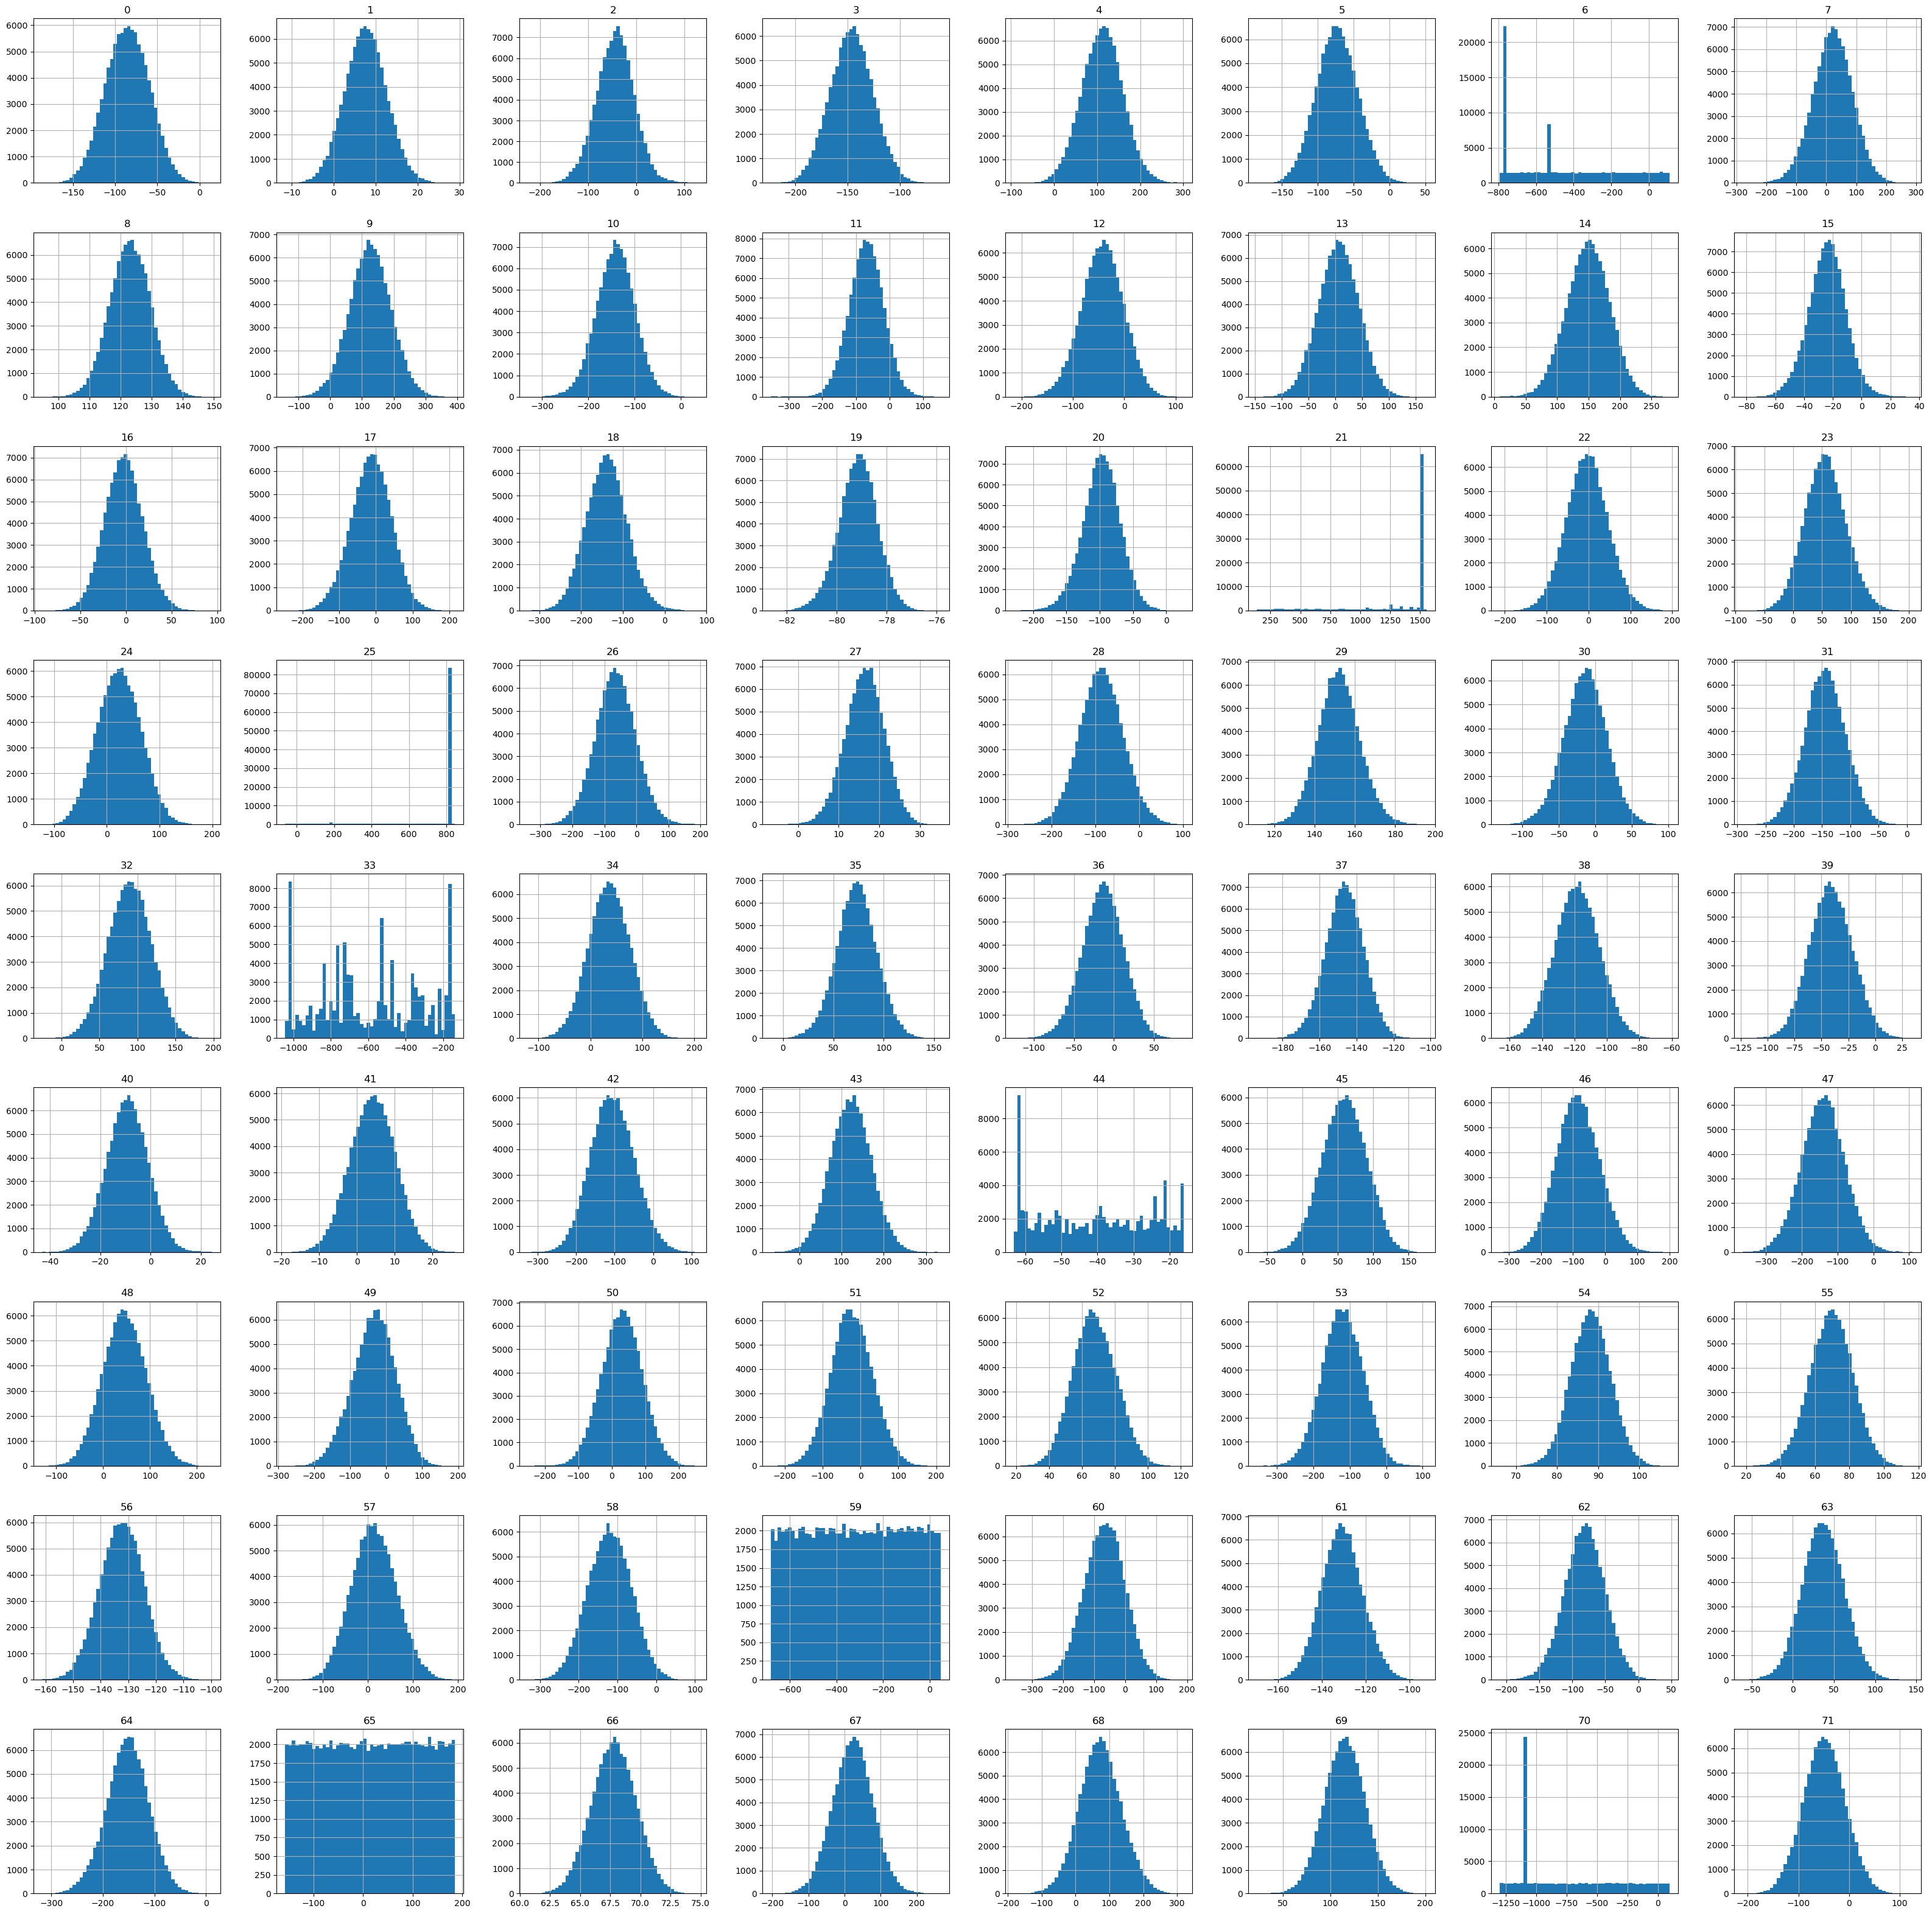

In [19]:
X_train.hist(bins=50, figsize=(40,40));

Краткий визуальный анализ полученных гистограмм признаков показывает, что большинство из них имеют нормальное или близкое к нормальному распределение, мат. ожидание, не равное нулю, и близкие по значению среднее арифметическое и медиану.
Также графики показывают, что есть некоторые признаки, имеющие отличное от нормального (и даже не близкое к нему) распределение (номера 6, 21, 25, 33, 44, 59, 65, 70), - пожалуй, эти признаки являются наиболее интересными для анализа.

### Признак `Target`

Рассмотрим целевой признак в обучающей выборке, определяющий жанр треков. Он является категориальным.

In [20]:
# информация о признаке
y_train.describe()

count         100000
unique         91794
top       41568-base
freq               7
Name: Target, dtype: object

С учетом количества уникальных значений признака выводить диаграмму распределения признака представляется нецелесообразным.

Результаты краткого исследования целевого признака показывают, что в значениях признака имеются повторы, при этом, в силу количества уникальных значений признака, изучить его на предмет неявных дубликатов и наличия дисбаланса  не представляется возможным.

### Признак `0`

Данный признак является вещественным и по ранее выполненному предварительному анализу выглядит непрерывным, построим гистограмму и диаграмму размаха признака.

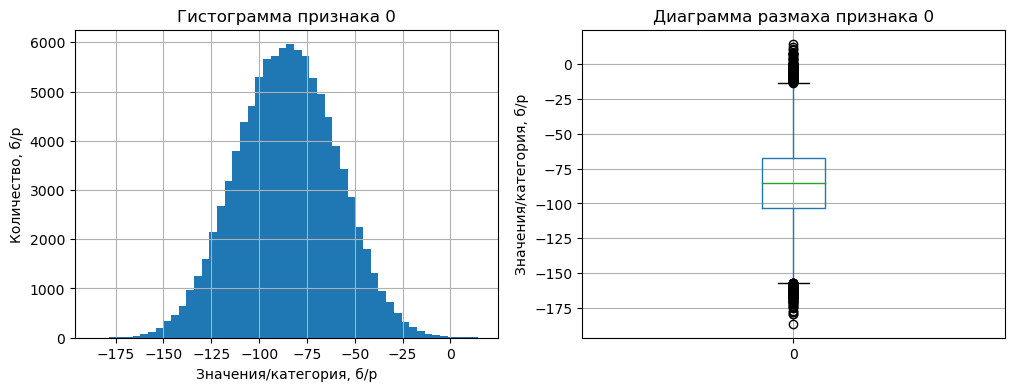

Среднее значение признака 0: -85.32867858750986 б/р
Медианное значение признака 0: -85.273695 б/р


In [21]:
feature_study(df=X_train, feature='0', bins_req=50, measure_unit='б/р')

Результаты исследования данного признака и похожих признаков (см. общую гистограмму выше), имеющих околонормальное или нормальное распределения (кроме признаков с номерами 6, 21, 25, 33, 44, 59, 65, 70, отмеченных выше), показывают:
- признак имеет нормальное (близкое к нему) распределение (но смещенное мат. ожидание признака);
- среднее и медианное значения признака приблизительно равны;
- аномальные значения - присутствуют в достаточном количестве (согласно диаграмме размаха) - но при этом не являются аномальными значениями в полноценном понимании аномалий (не являются выбросами, искажающими общую картину распределения значений признака).

Посмотрим, какое количество значений остается, если не учитывать аномальные значения признака (являющиеся таковыми согласно диаграмме размаха).

In [22]:
X_train[(X_train['0'] < -155) | (X_train['0'] > -19)].shape

(665, 72)

Ок. 700 объектов у нас подлежат удалению. Поскольку признак выглядит неплохо и по умолчанию, попробуем не терять эти данные и пока оставим признак, как есть.

Все, подобные нулевому, признаки с нормальным распределением оказались похожи с точки зрения анализа (вид распределения, мат. ожидание, аномальные значения), поэтому их мы тоже не тронем и перейдем к рассмотрению выбивающихся из общего ряда признаков (номера которых отмечены выше, под общей гистограммой).

### Признак `6`

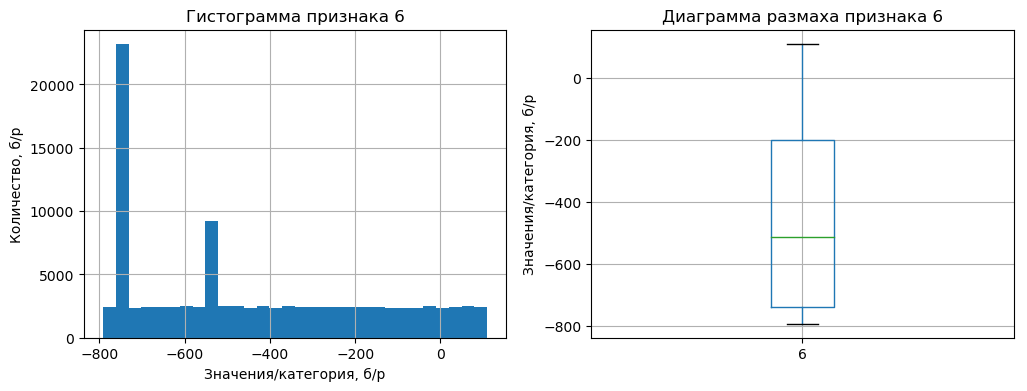

Среднее значение признака 6: -440.6151180373686 б/р
Медианное значение признака 6: -511.8377577524943 б/р


In [23]:
feature_study(df=X_train, feature='6', bins_req=30, measure_unit='б/р')

Это первый из признаков с не нормальным распределением (похоже на равномерное, но есть выбросы, их достаточно много - хотя при этом он не имеет аномальных значений согласно диаграмме размаха), с которым непонятно пока, что надо сделать. Он не является константным, не является нулевым, его нельзя просто так исключить из выборки, хотя, интуитивно кажется, что он будет мешать нашему поиску и модели обучения. Хотелось бы его удалить, но пока оставим в выборке.
Одним из вариантов, что можно было бы сделать - заменить все значения на три, например: самое частое (ок. -750), второе по частоте (ок. -550) и остальные (которых по количеству менее 5000, например). Но в связи с тем, что времени экспериментировать не очень много, а результат такой замены - не факт, что даст какой-то выигрыш - не будем этого делать.

### Признак `21`

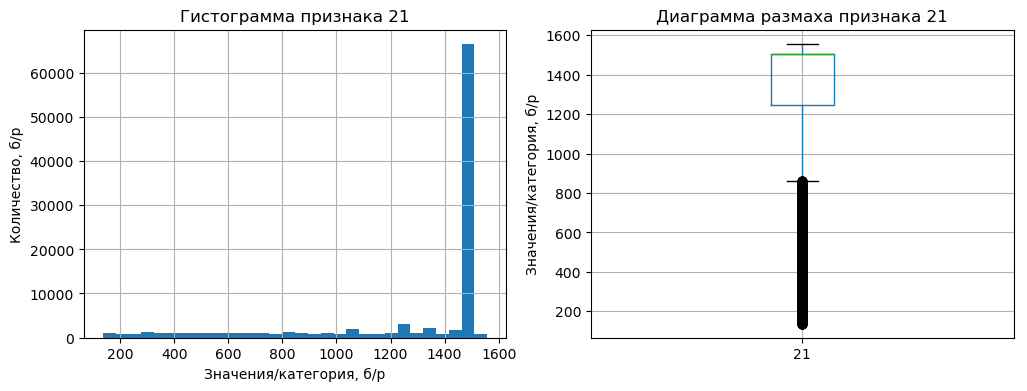

Среднее значение признака 21: 1297.2695779353028 б/р
Медианное значение признака 21: 1507.23127421948 б/р


In [24]:
feature_study(df=X_train, feature='21', bins_req=30, measure_unit='б/р')

Отфильтруем датасет по значению признака, частота которого выделяется из общей картины распределения и посмотрим, как изменится распределение в этом случае.

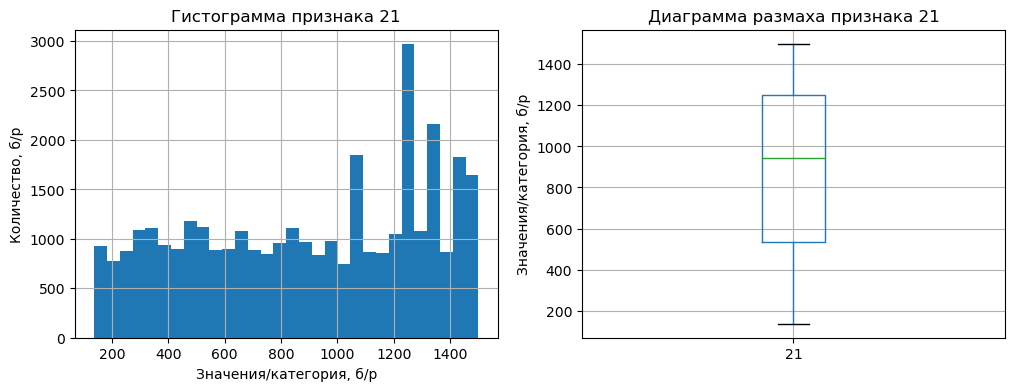

Среднее значение признака 21: 893.790867850835 б/р
Медианное значение признака 21: 941.5236307308212 б/р


In [25]:
feature_study(df=X_train[X_train['21'] < 1500], feature='21', bins_req=30, measure_unit='б/р')

Посмотрим, сколько объектов осталось в выборке после такой фильтрации.

In [26]:
X_train[X_train['21'] < 1500].shape

(34256, 72)

Увы, мы не можем себе позволить удалить более 2/3 данных из выборки просто так, тем более, что вид распределения особо не изменился (оно все так же ближе к равномерному, но с выбросами). Оставим признак пока как есть.

### Признак `25`

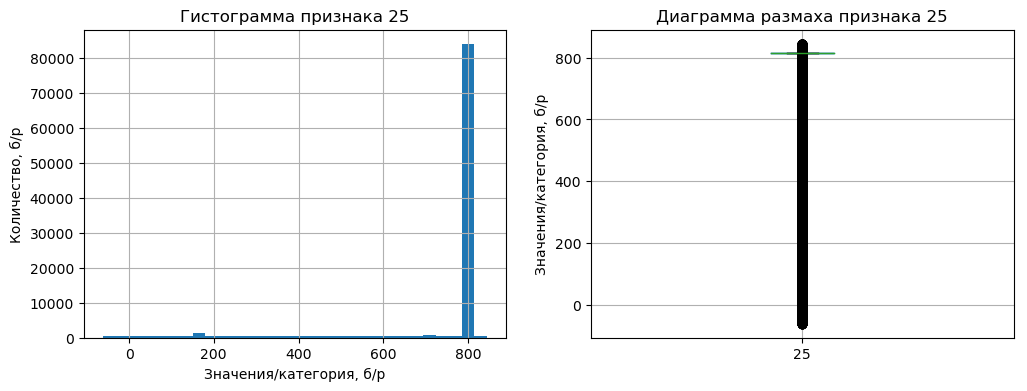

Среднее значение признака 25: 742.7888165806999 б/р
Медианное значение признака 25: 813.7700714289165 б/р


In [27]:
feature_study(df=X_train, feature='25', bins_req=30, measure_unit='б/р')

Отфильтруем датасет, посмотрим, сколько осталось объектов в выборке (аналогично предыдущему случаю.

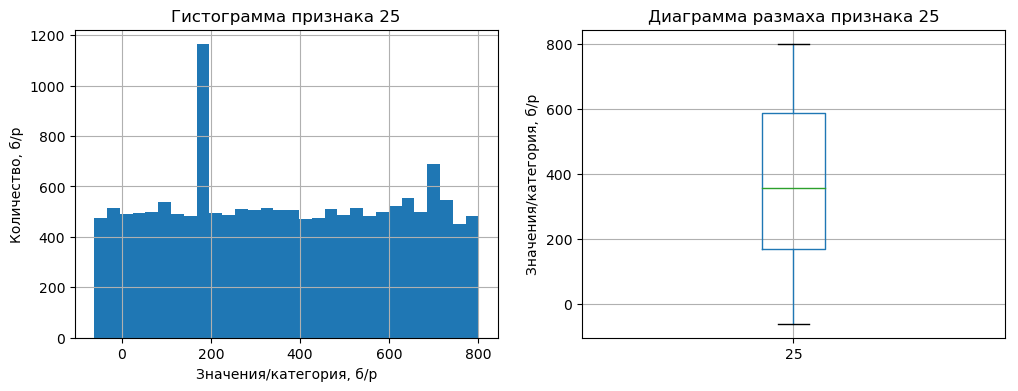

Среднее значение признака 25: 365.63187642705344 б/р
Медианное значение признака 25: 355.0226740532311 б/р


In [28]:
feature_study(df=X_train[X_train['25'] < 800], feature='25', bins_req=30, measure_unit='б/р')

Посмотрим, сколько объектов осталось в выборке после такой фильтрации.

In [29]:
X_train[X_train['25'] < 800].shape

(15855, 72)

И снова удаление не представляется возможным.


### Признак `33`

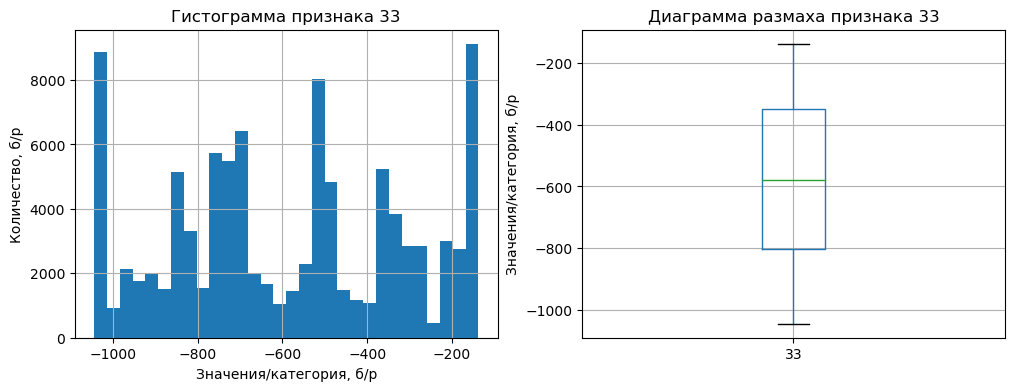

Среднее значение признака 33: -587.5517676084737 б/р
Медианное значение признака 33: -579.5903874885565 б/р


In [30]:
feature_study(df=X_train, feature='33', bins_req=30, measure_unit='б/р')

Признак не имеет ярко выраженного вида распределения, но в нем отсутствуют аномальные значения (согласно диаграмме размаха), среднее и медианные значения - близки, оставим признак и двинемся в обработке дальше.

### Признак `44`

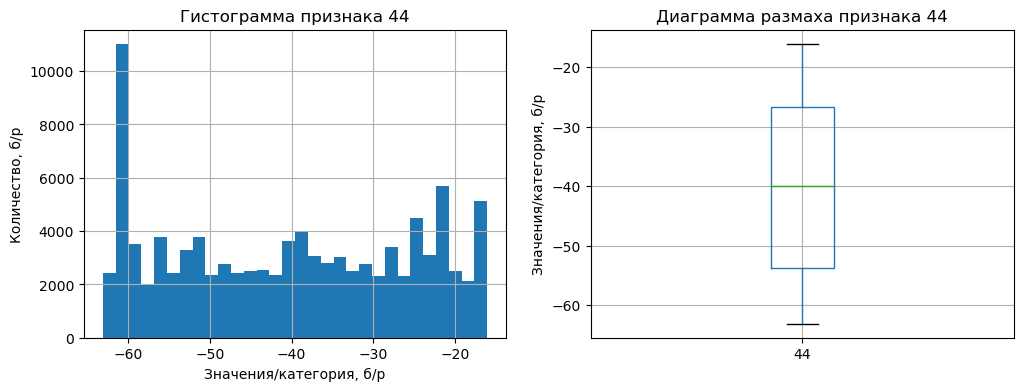

Среднее значение признака 44: -40.3202108380722 б/р
Медианное значение признака 44: -39.95456481840087 б/р


In [31]:
feature_study(df=X_train, feature='44', bins_req=30, measure_unit='б/р')

Двигаемся далее.

### Признак `59`

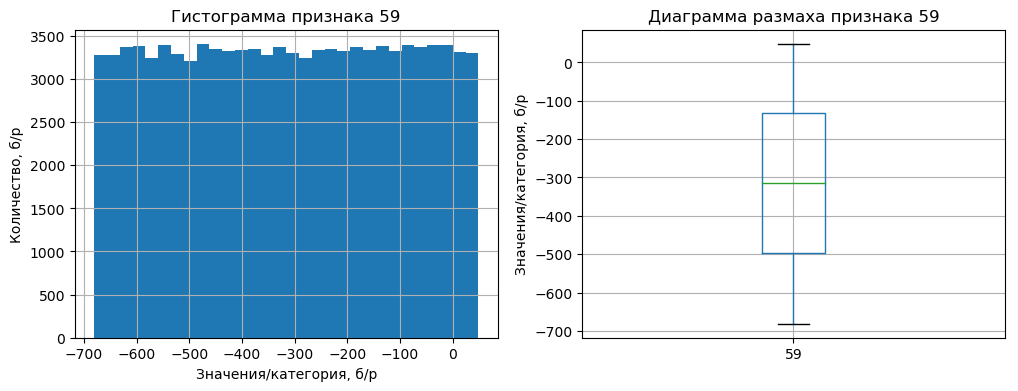

Среднее значение признака 59: -315.28223890201264 б/р
Медианное значение признака 59: -315.1772190530909 б/р


In [32]:
feature_study(df=X_train, feature='59', bins_req=30, measure_unit='б/р')

Статистики признака выглядят просто идеально (среднее и медиана - почти равны, аномальные значения - отсутствуют), но распределение признака не нормальное, больше похоже на равномерное. Пока непонятно, что делать и с этим признаком, оставим его в исходном виде.

### Признак `65`

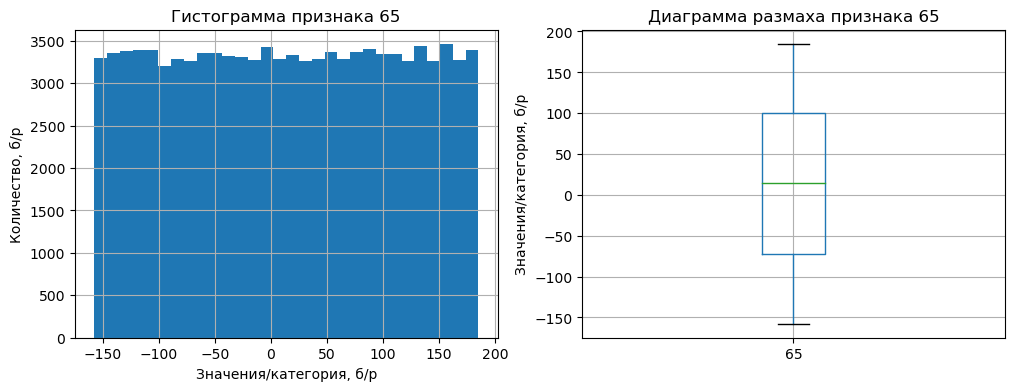

Среднее значение признака 65: 14.001695234429704 б/р
Медианное значение признака 65: 14.072662528028701 б/р


In [33]:
feature_study(df=X_train, feature='65', bins_req=30, measure_unit='б/р')

Ситуация с признаком аналогична ситуации с предыдущим (номер 59).

### Признак `70`

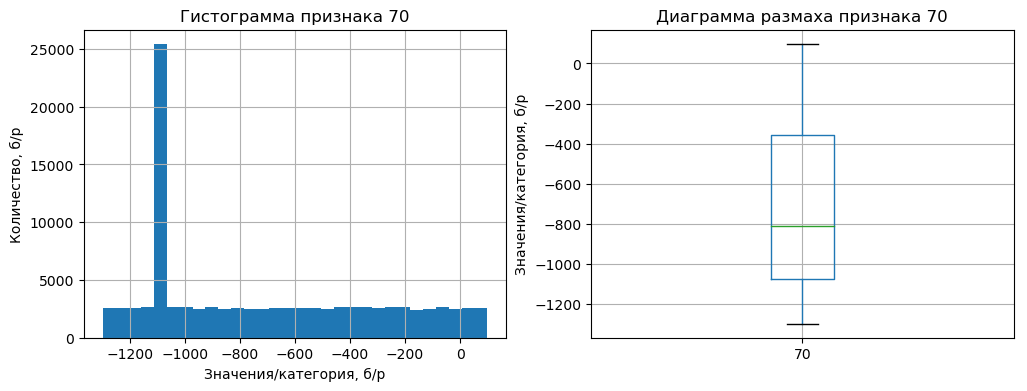

Среднее значение признака 70: -709.7615481263405 б/р
Медианное значение признака 70: -808.80169575276 б/р


In [34]:
feature_study(df=X_train, feature='70', bins_req=30, measure_unit='б/р')

Признак имеет выброс в районе значения -1100 (однако, это не визуализируется, как аномальное значение на диаграмме размаха), но это не подсказывает, как нам с этим признаком поступить. Оставим его пока без изменений.

По результатам краткого анализа признаков, выделяющихся из общей выборки (не имеющих нормального распределения), можно заключить, что пока удалить эти признаки из выборки мы не можем, никаких оснований у нас для этого нет. Попробуем выполнить масштабирование признаков, после чего проверим качество поиска с помощью FAISS.

## Разработка новых синтетических признаков

В разработку новых признаков (Feature Engineering) у нас (предварительно) войдет только один этап: обработка (нормализация/стандартизация/масштабирование) численных признаков (Feature Scaling), поскольку категориальные признаки в нашей выборке отсутствуют (формально таким признаком является целевой признак `Target`, но его кодирование мы выполнять не будем (у нас слишком много уникальных значений признака, кодировать его нецелесообразно).

Для начала определим столбцы выборок с численными признаками (исключая целевой признак).

In [35]:
num_cols = X_train.select_dtypes(include='number').columns # численные признаки

In [36]:
num_cols

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71'],
      dtype='object')

### Нормализация (масштабирование) численных признаков

Выполним масштабирование численных признаков в полученных датафреймах признаков с помощью инструмента `StandardScaler`. Масштабирование выполним следующим образом: обучим скэйлер на базовой выборке, а потом применим его для преобразования признаков из обучающей и тестовой выборок.

In [37]:
# удалим X_train
del X_train

In [38]:
%%time
# создадим объект - скэйлер
scaler = StandardScaler()
# scaler = RobustScaler()

# обучим базовую выборку с отмасштабированными численными признаками
X_base = pd.DataFrame(scaler.fit_transform(data_base[num_cols]), index=data_base.index, columns=num_cols)

CPU times: total: 6.58 s
Wall time: 12.4 s


Трансформируем остальные выборки.

In [40]:
%%time
# X_train[num_cols] = scaler.transform(X_train[num_cols])
X_train = pd.DataFrame(scaler.transform(data_train[num_cols]), index=data_train.index, columns=num_cols)
X_test = pd.DataFrame(scaler.transform(data_val[num_cols]), index=data_val.index, columns=num_cols)

CPU times: total: 93.8 ms
Wall time: 176 ms


In [41]:
# проверим размерности
print(X_base.shape, X_train.shape, X_test.shape)

(2918139, 72) (100000, 72) (100000, 72)


# Мэтчинг

In [42]:
dims = X_base.shape[1] # размерность вектора признаков для каждого объекта
n_cells = 50 # количество кластеров (ячейки Воронова?)
quantizer = faiss.IndexFlatL2(dims) # квантователь 
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells) # создание индекса с кластеризацией

Проверим, что индекс не обучен и затем - обучим его.

In [43]:
print(idx_l2.is_trained)

False


In [44]:
idx_l2.train(np.ascontiguousarray(X_base.values[:50000, :]).astype('float32'))

In [45]:
print(idx_l2.is_trained)

True


Проверим, добавлены ли в индекс наши вектора признаков и добавим их.

In [46]:
print(idx_l2.ntotal)

0


In [47]:
%%time
idx_l2.add(np.ascontiguousarray(X_base.values).astype('float32'))

CPU times: total: 3.69 s
Wall time: 2.28 s


In [48]:
print(idx_l2.ntotal)

2918139


Выполним поиск ближайших соседей (повторим бейзлайн задачи мэтчинга), с учетом того, что нам необходимо найти 5 похожих товаров.

In [51]:
%%time
distx, idx = idx_l2.search(np.ascontiguousarray(X_train.values).astype('float32'), K_NEIGHBORS)

CPU times: total: 3min 59s
Wall time: 1min 4s


Найдем значение метрики (оценим качество алгоритма поиска), получающееся после масштабирования признаков датасетов.

In [53]:
def acc_5(targets, indices, base_indices):
    """ Функция для расчета значения метрики accuracy
        входные параметры функции:
        targets - вектор целевого признака
        indices - матрица индексов найденных ближайших соседей
        base_index - словарь базовых индексов """
    
    acc = 0 # начальное значение метрики
    for target, el in zip(targets.values.tolist(), indices.tolist()):
        acc += int(target in [base_indices[r] for r in el])

    return 100 * acc / len(indices)

In [56]:
%%time
base_index = {k: v for k, v in enumerate(data_base.index.to_list())}

CPU times: total: 234 ms
Wall time: 710 ms


In [57]:
%%time
print(acc_5(y_train, idx, base_index), '%')

54.981 %
CPU times: total: 125 ms
Wall time: 410 ms


### Проверка данных на мультиколлинеарность

Найдем матрицу коэффициентов корреляции признаков обучающей выборки (не включая целевой признак по причинам, описанным ранее - размер матрицы с закодированным целевым признаком) с использованием готовых функций библиотеки phik.
При этом, не будем выводить значения и визуализировать (строить тепловую карту по найденной матрице коэффициентов корреляции признаков обучающей выборки) матрицу коэффициентов корреляции - в силу ее объемности она поместится для отображения на экране. Нам же важно лишь максимальное и минимальное значения в этой матрице.

In [58]:
%%time
# матрица коэффициентов корреляции признаков обучающей выборки
correlation_matrix = X_train.phik_matrix();
# correlation_matrix.round(2)

interval columns not set, guessing: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71']
CPU times: total: 1min 9s
Wall time: 1min 30s


Найдем максим. (но меньшее 1.0) и миним. значения коэффициентов корреляции.

In [60]:
correlation_matrix[correlation_matrix < 1.0].max().sort_values(ascending=False).head(1)

33    0.427656
dtype: float64

Итак, максим. значение коэффициента $\phi_K$ равно 0.4276 (при минимальном, равном 0.0). Это говорит о том, что между признаками матрицы обучения нет сильной линейной зависимости (хотя бы уровня 0.9), а значит, - мы не можем удалить какие-то из признаков из матрицы.

### Выводы по разделу

В ходе проведенной работы было выполнено следующее:
- краткие предобработка и исследовательский анализ признаков обучающей выборки:
    - анализ показал, что большинство признаков имеют нормальное распределение, но ряд признаков (под номерами 6, 21, 25, 33, 44, 59, 65 и 70) - имеют распределение, отличное от нормального;
    - признаки, имеющие не нормальное распределение, не были обработаны (не удалялись "аномальные" значения, не удалялись целиком признаки из выборок), поскольку не совсем понятно, что можно с ними сделать и лучшим решением кажется оставить их без изменений. Но в отношении некоторых признаков имеется предположение, что можно их сделать бинарными (или состоящими из 3 значений, например);
- нормализация (масштабирование/стандартизация) численных (а это - фактически все признаки из датасетов, кроме целевого признака) признаков с помощью стандартного инструмента StandardScaler;
- проверка данных (обучающей выборки) на мультиколлинеарность. Проверка показала, что максимальное (по модулю) значение коэффициента фи-корреляции $\phi_K$ равно 0.4276 - такая слабая линейная зависимость признаков обучающей выборки не позволяет нам сделать вывод о возможности удаления каких-либо признаков из выборки;
- проверено качество решения задачи поиска похожих товаров для отмасштабированных (скэйлированых) данных, которая показала, что только лишь одна нормализация позволила повысить качество решения задачи мэтчинга с 8.693 %  до 54.981 % - более, чем в 6 раз, что уже является неплохим результатом (при прочих равных условиях).

## Исследование опций алгоритма

Проведем процедры обучения индекса и поиска похожих товаров, варьируя значения таких опций алгоритма FAISS, как `n_cells` (количество кластеров, на которые разбивается датасет) и `nprobe` (количество кластеров, в которых производится поиск похожих товаров).

Поскольку не совсем понятно, можно ли для поиска по сетке параметров использовать какую-нибудь готовую функцию типа GridSearchCV, выполним исследование с поиском оптимальных значений параметров (опций) алгоритма вручную.

Зададим диапазоны значений параметров с большим шагом.

In [61]:
# диапазоны значений параметров алгоритма
n_cells_array = range(50, 201, 50)
nprobe_array = range(1, 10, 4)
best_n_cells = 1
best_nprobe = 1
best_acc_5 = 0
best_distx = []
best_idx = []

Выполним все процедуры по поиску ближайших соседей и расчету метрики качества поиска.

In [62]:
dims = X_base.shape[1] # размерность вектора признаков для каждого объекта
quantizer = faiss.IndexFlatL2(dims) # квантователь 

In [ ]:
%%time
n_iter = 1
for n_cells in n_cells_array:
    for nprobe in nprobe_array:
#         print('iteration...', n_iter, 'n_cells...', n_cells, 'nprobe...', nprobe)
        idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells) # создание индекса с кластеризацией
        idx_l2.train(np.ascontiguousarray(X_base.values[:50000, :]).astype('float32'))
        idx_l2.add(np.ascontiguousarray(X_base.values).astype('float32'))
        idx_l2.nprobe = nprobe # количество кластеров для поиска
        distx, idx = idx_l2.search(np.ascontiguousarray(X_train.values).astype('float32'), K_NEIGHBORS)
        current_acc_5 = acc_5(y_train, idx, base_index)
        print('iteration...', n_iter, 'n_cells...', n_cells, 'nprobe...', nprobe,
              'acc@5...', current_acc_5)
        n_iter += 1
        if current_acc_5 > best_acc_5:
            best_acc_5 = current_acc_5
            best_n_cells = n_cells
            best_nprobe = nprobe
            best_distx = distx
            best_idx = idx

print('best acc@5:', best_acc_5, '%')
print('best_n_cells:', best_n_cells)
print('best_nprobe:', best_nprobe)

iteration... 1 n_cells... 50 nprobe... 1 acc@5... 54.981
iteration... 2 n_cells... 50 nprobe... 5 acc@5... 63.792


Далее попробуем точечно искать некоторые значения параметров и вычислять значения метрики качества решения задачи мэтчинга.

In [ ]:
n_cells = 1000
nprobe = 1

In [ ]:
%%time
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells) # создание индекса с кластеризацией
idx_l2.train(np.ascontiguousarray(X_base.values[:50000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(X_base.values).astype('float32'))
idx_l2.nprobe = nprobe # количество кластеров для поиска
distx, idx = idx_l2.search(np.ascontiguousarray(X_train.values).astype('float32'), K_NEIGHBORS)
current_acc_5 = acc_5(y_train, idx, base_index)
print(current_acc_5, '%')

Еще один вариант.

In [ ]:
n_cells = 1000
nprobe = 10

In [ ]:
%%time
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells) # создание индекса с кластеризацией
idx_l2.train(np.ascontiguousarray(X_base.values[:50000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(X_base.values).astype('float32'))
idx_l2.nprobe = nprobe # количество кластеров для поиска
distx, idx = idx_l2.search(np.ascontiguousarray(X_train.values).astype('float32'), K_NEIGHBORS)
current_acc_5 = acc_5(y_train, idx, base_index)
print(current_acc_5, '%')

И так.

In [ ]:
n_cells = 10
nprobe = 1

In [ ]:
%%time
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells) # создание индекса с кластеризацией
idx_l2.train(np.ascontiguousarray(X_base.values[:50000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(X_base.values).astype('float32'))
idx_l2.nprobe = nprobe # количество кластеров для поиска
distx, idx = idx_l2.search(np.ascontiguousarray(X_train.values).astype('float32'), K_NEIGHBORS)
current_acc_5 = acc_5(y_train, idx, base_index)
print(current_acc_5, '%')

Уравняем количество ячеек и ячеек, в которых будет осуществляться поиск.

In [ ]:
n_cells = 10
nprobe = 10

In [ ]:
%%time
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells) # создание индекса с кластеризацией
idx_l2.train(np.ascontiguousarray(X_base.values[:50000, :]).astype('float32'))
idx_l2.add(np.ascontiguousarray(X_base.values).astype('float32'))
idx_l2.nprobe = nprobe # количество кластеров для поиска
distx, idx = idx_l2.search(np.ascontiguousarray(X_train.values).astype('float32'), K_NEIGHBORS)
current_acc_5 = acc_5(y_train, idx, base_index)
print(current_acc_5, '%')

Вернемся к ранее найденным параметрам из диапазона и попробуем решить задачу, выбирая количество кластеров для поиска в "хорошем" диапазоне (с учетом ранее найденного значения nprobe=9), зафиксировав количество кластеров, на которые разбивается датасет.

In [ ]:
# диапазоны значений параметров алгоритма
n_cells = 100
nprobe_array = range(9, 16, 1)
best_n_cells = 1
best_nprobe = 1
best_acc_5 = 0
best_distx = []
best_idx = []

In [ ]:
%%time
n_iter = 1
for nprobe in nprobe_array:
    idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells) # создание индекса с кластеризацией
    idx_l2.train(np.ascontiguousarray(X_base.values[:50000, :]).astype('float32'))
    idx_l2.add(np.ascontiguousarray(X_base.values).astype('float32'))
    idx_l2.nprobe = nprobe # количество кластеров для поиска
    distx, idx = idx_l2.search(np.ascontiguousarray(X_train.values).astype('float32'), K_NEIGHBORS)
    current_acc_5 = acc_5(y_train, idx, base_index)
    print('iteration...', n_iter, 'n_cells...', n_cells, 'nprobe...', nprobe,
          'acc@5...', current_acc_5)
    n_iter += 1
    if current_acc_5 > best_acc_5:
        best_acc_5 = current_acc_5
        best_n_cells = n_cells
        best_nprobe = nprobe
        best_distx = distx
        best_idx = idx

print('best acc@5:', best_acc_5, '%')
print('best_n_cells:', best_n_cells)
print('best_nprobe:', best_nprobe)

### Выводы по разделу

По результатам проведенных исследований можно сделать следующие предварительные выводы:

увеличение количества кластеров, на которые мы разбиваем датасет (n_cells), приводит к уменьшению времени поиска, но вместе с тем - и к снижению качества решаемой задачи;
уменьшение количества кластеров, на которые разбиваем датасет - приводит к увеличению времени поиска и одновременно - к повышению качества задачи мэтчинга;
также к росту качества поиска приводит увеличение количества кластеров, в которых будет осуществляться поиск (nprobe);
к сожалению, в силу ограниченности времени и вычислительных ресурсов мы не можем промоделировать большое количество вариантов перебора этих двух параметров (n_cells и nprobe) с достаточно маленьким шагом, чтобы найти оптимальные значения этих параметров, а проведенные выше исследования дали лишь некие квазиоптимальные значения (к тому же, мы не можем утверждать, что эта гиперповерхность параметров - унимодальна);
согласно проведенным исследованиям, наилучшие результаты дают значения n_cells = nprobe = 10 (65.838 %), однако, решение задачи мэтчинга с указанными значениями занимает очень длительное время.

## Общий вывод

По результатам проведенной работы с помощью библиотеки FAISS был разработан и протестирован алгоритм мэтчинга товаров, позволяющий каждому товару из валидационной выборки (та, которая, трэйн, но по факту она оказывается валидационной?) выборки сопоставить наиболее близкие товары из базовой выборки (по заданной метрике качества - acc@5).<br>
При решении данной задачи были выполнены следующие работы:
- проведен первичиный исследовательский анализ и предобработка данных исходных датасетов;
- найдены признаки, имеющие отличное от нормального распределения (под номерами 6, 21, 25, 33, 44, 59, 65 и 70), которые, скорее всего, являются препятствием для успешного обучения индекса FAISS (и последующего поиска похожих товаров) и возможных применяемых моделей;
- повторено базовое решение (бейзлайн) задачи мэтчинга, давшее ок. 8.6 % качество;
- проведена нормализация (масштабирование/стандартизация) признаков с помощью базового инструмента StandardScaler;
- проведена проверка данных на коллинеарность, получено макс. значение коэффициента фи-корреляции $\phi_K$, равное 0.4276 - такая слабая линейная зависимость признаков не позволила нам сделать математический вывод о возможности удаления каких-либо признаков из выборок;
- проверено качество решения задачи поиска похожих товаров для отмасштабированных (скэйлированых) данных, которая показала, что только лишь одна нормализация позволила повысить качество решения задачи мэтчинга с 8.693 %  до 54.981 % - более, чем в 6 раз, что уже является неплохим результатом (при прочих равных условиях);
- проведено исследование опций алгоритма (функций библиотеки FAISS), таких как, количество кластеров, на которые разбивается выборка (n_cells) и количество соседних кластеров, в которых осуществляется поиск после разбиения на n_cells кластеров и нахождения центроидов данных кластеров (nprobe). Исследование показало, что, в целом, - качество растет с увеличением nprobe и падает с увеличением n_cells, время поиска при этом изменяется обратно пропорционально (например, растет с уменьшением n_cells);
- в неких небольших диапазонах изменения указанных параметров, наилучшие результаты дают значения n_cells = nprobe = 10 (65.838 %), однако, решение задачи мэтчинга с указанными значениями занимает очень длительное время;
- значения параметров алгоритма, дающие максимальное качество при отсутствии ограничений на время поиска, получились следующие (опять же, в некоторых небольших изменениях диапазонов данных параметров): n_cells = 100, nprobe = 15. Значение метрики качества при этом равно acc@5 = 65%.